# Stock Series

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Nvidia. 

In [239]:
import pandas as pd
import numpy as np
import datetime
data = pd.read_csv('NVDA.csv',index_col=0)
data.index=data.index.astype(np.datetime64)
stock = data['Close']

C:\Users\16692\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:308: FutureWarning: Passing in 'datetime64' dtype with no precision is deprecated
and will raise in a future version. Please pass in
'datetime64[ns]' instead.
  dtype=dtype, **kwargs)


In [240]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Populating the interactive namespace from numpy and matplotlib


C:\Users\16692\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


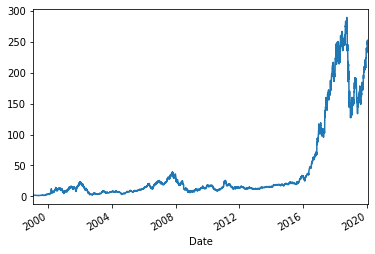

In [241]:
%pylab inline
stock.plot()

In [242]:
stock.head()
stock.tail()

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
Name: Close, dtype: float64

Date
2020-01-22    250.110001
2020-01-23    252.860001
2020-01-24    250.479996
2020-01-27    240.199997
2020-01-28    247.970001
Name: Close, dtype: float64

Use the Series <i>stock</i> to answer the following questions.

## Question 1

### Q1.1, When is the first date this sotck close at more than 130 dollars? (pick the closest date in Camino)

In [243]:
Date = stock[stock.values>=130].head(1).index[0]
Date

Timestamp('2017-05-15 00:00:00')

### Q1.2, After stock price hit 130 dollar, how many trading days it took to reach the historical high? (pick the closest number of days in Camino)

In [244]:
Date = stock[stock.values>=130].head(1).index[0]
Date #first date this sotck close at more than 130 dollars
Hisdate1 =stock.nlargest(1).index[0]
Hisdate1 #historical high
 

Timestamp('2017-05-15 00:00:00')

Timestamp('2018-10-01 00:00:00')

In [246]:
td=stock[Date:Hisdate1]# All the days between Starting Date and Historical High  
len(td)

349

### Question 2

### Find the top 5 largest one-day % gain (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % drop. (pick the date closest to the day with the largest gain ratio in Camino)

In [247]:
StockwithShift  = stock.shift(-1) #Shifting the Value by -1 

In [262]:
Gain_series = pd.Series(StockwithShift)
Gain_series.pct_change().nlargest(5)*100 #(((stockwithshift-stock)/stock)*100)

Date
2000-03-06    42.414523
2003-05-08    33.063514
2001-01-02    30.688937
2016-11-10    29.806706
2000-03-10    26.483055
Name: Close, dtype: float64

## Question 3

###  With following investment strategy: buy on day 1, sell on day 3. If based on this strategy, what's the most dollars amount you can lose in one trading?Â  Also report the buying and selling date for that particular trade. ( pick the closest dollar amount it dropped in Camino)

In [290]:
new_price=stock.shift(-2) #Shifting the Value by -2

In [306]:
loss=new_price-stock
loss1=loss.nsmallest(1).values[0] 
loss1

-57.69000199999999

In [302]:
buying_date=loss.nsmallest(1).index[0] # to find the index of the smallest value from loss 
buying_date

Timestamp('2018-11-15 00:00:00')

In [292]:
stock[buying_date] #buyong date 

202.389999

In [301]:
selling_rate=loss1+stock[buying_date]
selling_rate


144.699997

In [300]:
selling_date=stock[stock==selling_rate].index[0]
selling_date #selling date 


Timestamp('2018-11-19 00:00:00')

## Question 4

### In which days did we observe that the price has increased of more than 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where *d* is the trading session date when the increase was observed and *gain* is the maximum percentage gain (%) observed over the 9 days preceding session(today compare with previous 9 trading days).
#### *Hint:* use a **rolling** minimum . Today + 9 more days -> use rolling(10). (pick the closest date that has the highest gain ratio in Camino) 

In [297]:
rol = stock.rolling(10).min() # rolling 10 values  
result=((stock-rol)/rol)*100 #Gain Percentage 
gain_p=result[result>60] # To check Gain Greater than 60 
gain_p.nlargest(5) # Largest 


Date
2000-03-13    157.605178
2000-03-10    103.667739
2000-03-14     90.075506
2000-03-15     82.308515
2000-02-18     77.011484
Name: Close, dtype: float64

## Question 5

### What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. 
#### *Hint:* Use method cummax() or method cummin(). *Cummax/Cummin* returns the maximum/minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.
#### (Fill in blank for the buying and selling dates in Camino with the format 'buying-date/selling-date' (for example, 2001-01-01/2010-12-31)

In [257]:
maxloss= (stock.cummax() - stock)/stock.cummax()*100
maxloss.nlargest()

Date
2002-10-09    89.722492
2002-10-08    89.527264
2002-10-07    89.206527
2002-10-10    89.192583
2002-10-04    88.648726
Name: Close, dtype: float64

In [258]:
sell_date_max_loss = maxloss.nlargest(1).index[0]
maxloss.nlargest(1)

Date
2002-10-09    89.722492
Name: Close, dtype: float64

In [259]:
sell_date_max_loss
stock[sell_date_max_loss]

Timestamp('2002-10-09 00:00:00')

2.456667

In [261]:
buying_date = stock[:sell_date_max_loss].nlargest(1).index[0]
buying_date

Timestamp('2002-01-03 00:00:00')